In [1]:
import os
os.chdir("..")

In [2]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [9]:
img = cv2.imread('data/ShapeNetCore.v1/03001627_outputs/1006be65e7bc937e9141f9b58470d646/clean_c019_l02.png', cv2.IMREAD_UNCHANGED)

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
# function to overlay a transparent image on background.
def transparentOverlay(src , overlay , pos=(0,0),scale = 1):
    """
    :param src: Input Color Background Image
    :param overlay: transparent Image (BGRA)
    :param pos:  position where the image to be blit.
    :param scale : scale factor of transparent image.
    :return: Resultant Image
    """
    overlay = cv2.resize(overlay,(0,0),fx=scale,fy=scale)
    h,w,_ = overlay.shape  # Size of foreground
    rows,cols,_ = src.shape  # Size of background Image
    y,x = pos[0],pos[1]    # Position of foreground/overlay image
    
    #loop over all pixels and apply the blending equation
    for i in range(h):
        for j in range(w):
            if x+i >= rows or y+j >= cols:
                continue
            alpha = float(overlay[i][j][3]/255.0) # read the alpha channel 
            src[x+i][y+j] = alpha*overlay[i][j][:3]+(1-alpha)*src[x+i][y+j]
    return src

In [12]:
def blend_transparent(face_img, overlay_t_img):
    # Split out the transparency mask from the colour info
    overlay_img = overlay_t_img[:,:,:3] # Grab the BRG planes
    w, h = overlay_t_img.shape[1], overlay_t_img.shape[0]
    overlay_mask = overlay_t_img[:,:,3:]  # And the alpha plane

    # Again calculate the inverse mask
    background_mask = 255 - overlay_mask

    # Turn the masks into three channel, so we can use them as weights
    overlay_mask = cv2.cvtColor(overlay_mask, cv2.COLOR_GRAY2BGR)
    background_mask = cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)

    # Create a masked out face image, and masked out overlay
    # We convert the images to floating point in range 0.0 - 1.0
    face_part = (face_img * (1 / 255.0)) * (background_mask * (1 / 255.0))
    overlay_part = (overlay_img * (1 / 255.0)) * (overlay_mask * (1 / 255.0))

    # And finally just add them together, and rescale it back to an 8bit integer image    
    return np.uint8(cv2.addWeighted(face_part, 255.0, overlay_part, 255.0, 0.0))

In [13]:
bg = cv2.imread('data/indoor_images/airport_inside/airport_inside_0001.jpg', -1)

In [14]:
bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)

In [15]:
bg = cv2.resize(bg, (512, 512))

In [16]:
bg.shape

(512, 512, 3)

In [17]:
result = blend_transparent(bg, img)

In [18]:
# Overlay transparent images at desired postion(x,y) and Scale. 
result = transparentOverlay(bg, img,(100,0),0.7)
# result = transparentOverlay(bImg,logoImage,(800,400),2)

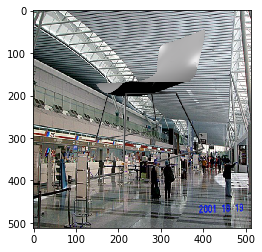

In [19]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

In [20]:
from pathlib import Path

In [21]:
class InsertBackground(object):
    '''Insert random background to PNG image with transparent layer.'''
    def __init__(self, img_size, folder_name, extension='jpg'):
        self.img_size = img_size
        self.folder = Path(folder_name)
        self.img_list = list(self.folder.glob(f"**/*.{extension}"))
        self.len = len(self.img_list)
        
    def __len__(self):
        return self.len
    
    def __call__(self, img):
        idx = np.random.randint(0, self.len)
        bg = cv2.imread(str(self.img_list[idx]), -1)
        bg = cv2.cvtColor(bg, cv2.COLOR_BGR2RGB)
        bg = cv2.resize(bg, (self.img_size, self.img_size))
        return blend_transparent(bg, img)
        
    
    @staticmethod
    def blend_transparent(face_img, overlay_t_img):
        # Split out the transparency mask from the colour info
        overlay_img = overlay_t_img[:,:,:3] # Grab the BRG planes
        w, h = overlay_t_img.shape[1], overlay_t_img.shape[0]
        overlay_mask = overlay_t_img[:,:,3:]  # And the alpha plane

        # Again calculate the inverse mask
        background_mask = 255 - overlay_mask

        # Turn the masks into three channel, so we can use them as weights
        overlay_mask = cv2.cvtColor(overlay_mask, cv2.COLOR_GRAY2BGR)
        background_mask = cv2.cvtColor(background_mask, cv2.COLOR_GRAY2BGR)

        # Create a masked out face image, and masked out overlay
        # We convert the images to floating point in range 0.0 - 1.0
        face_part = (face_img * (1 / 255.0)) * (background_mask * (1 / 255.0))
        overlay_part = (overlay_img * (1 / 255.0)) * (overlay_mask * (1 / 255.0))

        # And finally just add them together, and rescale it back to an 8bit integer image    
        return np.uint8(cv2.addWeighted(face_part, 255.0, overlay_part, 255.0, 0.0))

In [22]:
bg_aug = InsertBackground(512, '../data/indoor_images/')

In [23]:
len(bg_aug)

0

In [24]:
plt.imshow(bg_aug(img))

ValueError: low >= high

In [3]:
from PIL import Image

In [4]:
img = Image.open('data/ShapeNetCore.v1/03001627_outputs/1006be65e7bc937e9141f9b58470d646/clean_c019_l02.png')
bg = Image.open('data/indoor_images/airport_inside/airport_inside_0001.jpg')
# bg.paste(img, (0,0), mask=img)

In [5]:
img.size

(512, 512)

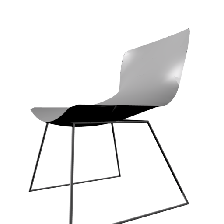

In [6]:
img_resize = img.resize((224,224))
img_resize

In [7]:
bg = bg.resize((512,512))

In [8]:
bg.paste(img_resize, (100, 200), img_resize)

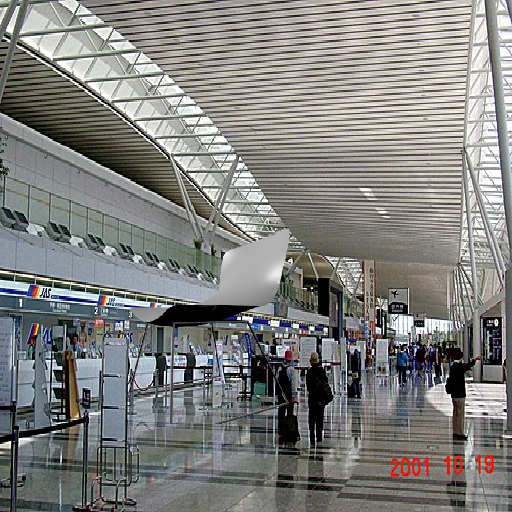

In [9]:
bg

In [10]:
bg.paste(img, (0,0), mask=img)

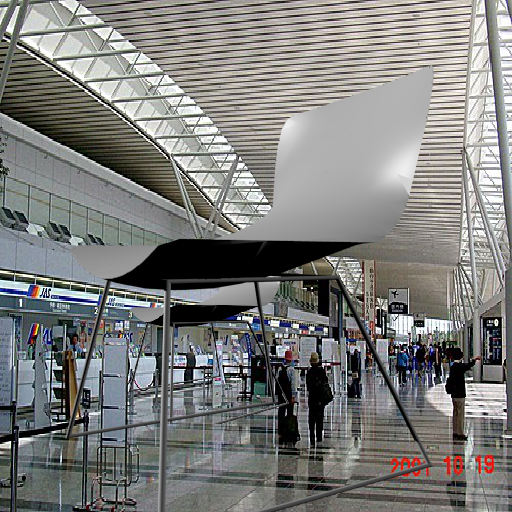

In [11]:
bg

In [20]:
%load_ext autoreload
%autoreload 2

In [45]:
from im2mesh.data.transforms import InsertBackground

In [60]:
bg_aug = InsertBackground('data/indoor_images/', 512, scale=0.9)

In [61]:
output = bg_aug(img)

[51, 4]


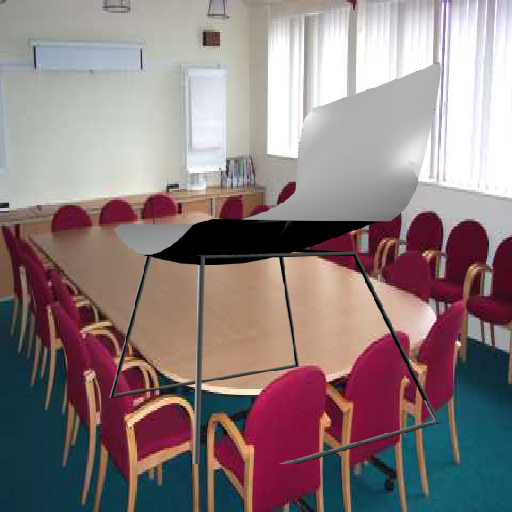

In [62]:
output

In [63]:
a =[1]

In [68]:
a.insert(-1, 4)

In [69]:
a

[2, 3, 4, 1]